In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [2]:
datas = pd.read_csv('passingevents.csv')

In [3]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23429 entries, 0 to 23428
Data columns (total 11 columns):
MatchID                23429 non-null int64
TeamID                 23429 non-null object
OriginPlayerID         23429 non-null object
DestinationPlayerID    23429 non-null object
MatchPeriod            23429 non-null object
EventTime              23429 non-null float64
EventSubType           23429 non-null object
EventOrigin_x          23429 non-null int64
EventOrigin_y          23429 non-null int64
EventDestination_x     23429 non-null float64
EventDestination_y     23429 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 2.0+ MB


In [4]:
raceID1 = datas[datas.TeamID=='Huskies']#[datas.MatchID==1]
raceID1

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0
8,1,Huskies,Huskies_D1,Huskies_F1,1H,130.656530,Head pass,34,91,52.0,97.0
11,1,Huskies,Huskies_D1,Huskies_G1,1H,161.221470,Simple pass,14,65,11.0,50.0
12,1,Huskies,Huskies_G1,Huskies_G1,1H,164.626056,Hand pass,11,50,5.0,45.0
13,1,Huskies,Huskies_D1,Huskies_D2,1H,247.469049,Simple pass,17,92,22.0,62.0
14,1,Huskies,Huskies_D2,Huskies_D3,1H,249.694665,Simple pass,22,62,19.0,24.0
15,1,Huskies,Huskies_D3,Huskies_G1,1H,251.513079,Simple pass,19,24,8.0,45.0
16,1,Huskies,Huskies_G1,Huskies_D3,1H,257.295203,Simple pass,8,45,19.0,13.0


In [5]:
raceID1_values = raceID1.values

In [6]:
raceID1_values[0]

array([1, 'Huskies', 'Huskies_D1', 'Huskies_F1', '1H', 46.32350099999999,
       'Head pass', 34, 97, 59.0, 95.0], dtype=object)

In [7]:
def distance(x1,y1,x2,y2):
    return ((x2-x1)**2+(y2-y1)**2)**0.5

In [8]:
dict = {}
average_number_of_pass = {}
average_number_of_pass_per_person ={}
map_sportman = {}
count = -1
for value,data in enumerate(raceID1_values):
#     if value >=10:
#         break
#     print('发起者：%s 接受者：%s 时间：%s 半场  %s 秒  动作类型： %s 传球距离：%s '
#           %(data[2],data[3],data[4],data[5],data[6],distance(data[7],data[8],data[9],data[10])))
    if data[2]+' To '+data[3] in dict:
        dict[data[2]+' To '+data[3]] +=1
    else:
        dict[data[2]+' To '+data[3]] =1
    if data[0] in average_number_of_pass:
        average_number_of_pass[data[0]]+=1
    else:
        average_number_of_pass[data[0]]=1
    if data[2] in average_number_of_pass_per_person:
        average_number_of_pass_per_person[data[2]]+=1
    else:
        average_number_of_pass_per_person[data[2]]=1
    if data[2] not in map_sportman:
        map_sportman[data[2]]= count = count+1

In [9]:
map_sportman_reserve = {}
for key,value in map_sportman.items():
    map_sportman_reserve[value]=key

In [10]:
graph = np.zeros((len(map_sportman),len(map_sportman)))
for value,data in enumerate(raceID1_values):
#     print(data)
    graph[ map_sportman[data[2]] , map_sportman[data[3]]] +=1 

In [11]:
graph

array([[  2.,  92.,   3., 107.,  59., 105.,  73.,  51.,  49.,   5.,  23.,
         57.,  26.,   0.,  25.,  21.,   4.,   3.,   6.,  19.,  34.,   2.,
          2.,  13.,   2.,  19.,  18.,  23.,   6.,   2.],
       [ 85.,   7.,  10.,  20.,  63.,  60.,  79., 143., 182.,   9.,  34.,
         79.,  72.,   3.,  54.,  77.,   3.,  25.,  10.,  36.,  70.,   8.,
          6.,  20.,   4.,  13.,  31.,  46.,   3.,   3.],
       [  2.,   6.,   2.,   2.,   3.,   3.,  12.,  12.,   5.,   2.,   4.,
          3.,   5.,   0.,   1.,   8.,   0.,   0.,   0.,   3.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.,   0.,   0.],
       [ 76.,  24.,   0.,   2.,  29.,  49.,  14.,  19.,  22.,   5.,  77.,
         22.,   7.,   1.,  27.,  10.,   0.,   5.,   2.,  15.,  18.,   0.,
          0.,  12.,   1.,   8.,   6.,   7.,   9.,   6.],
       [ 62.,  46.,   0.,  62.,   2.,  49.,  39.,  44.,  56.,   1.,  13.,
         47.,  22.,   1.,  52.,  12.,   2.,   1.,   5.,   8.,  26.,   1.,
          4.,   2.,   1.,   4., 

In [12]:
dict

{'Huskies_D1 To Huskies_F1': 23,
 'Huskies_M1 To Huskies_F2': 182,
 'Huskies_M2 To Huskies_M3': 12,
 'Huskies_D1 To Huskies_G1': 107,
 'Huskies_G1 To Huskies_G1': 2,
 'Huskies_D1 To Huskies_D2': 59,
 'Huskies_D2 To Huskies_D3': 49,
 'Huskies_D3 To Huskies_G1': 120,
 'Huskies_G1 To Huskies_D3': 49,
 'Huskies_D3 To Huskies_D4': 59,
 'Huskies_D4 To Huskies_D3': 35,
 'Huskies_G1 To Huskies_F1': 77,
 'Huskies_D1 To Huskies_M3': 51,
 'Huskies_M3 To Huskies_M1': 168,
 'Huskies_M2 To Huskies_D3': 3,
 'Huskies_D3 To Huskies_M3': 54,
 'Huskies_M3 To Huskies_D3': 56,
 'Huskies_G1 To Huskies_D1': 76,
 'Huskies_D3 To Huskies_M2': 5,
 'Huskies_D3 To Huskies_D2': 35,
 'Huskies_D2 To Huskies_D1': 62,
 'Huskies_D1 To Huskies_M1': 92,
 'Huskies_M1 To Huskies_D1': 85,
 'Huskies_M2 To Huskies_D2': 3,
 'Huskies_D1 To Huskies_F2': 49,
 'Huskies_M3 To Huskies_D1': 74,
 'Huskies_D2 To Huskies_M3': 44,
 'Huskies_M3 To Huskies_D2': 46,
 'Huskies_D2 To Huskies_M1': 46,
 'Huskies_D2 To Huskies_F2': 56,
 'Huskies_

In [13]:
max(dict.values())

182

In [14]:
numbers= dict.values()
numbers

dict_values([23, 182, 12, 107, 2, 59, 49, 120, 49, 59, 35, 77, 51, 168, 3, 54, 56, 76, 5, 35, 62, 92, 85, 3, 49, 74, 44, 46, 46, 56, 105, 7, 63, 98, 12, 9, 30, 1, 2, 1, 5, 24, 117, 34, 27, 56, 6, 88, 30, 2, 55, 47, 2, 5, 73, 3, 58, 143, 64, 66, 63, 4, 62, 30, 50, 13, 3, 63, 9, 11, 4, 97, 25, 3, 10, 6, 84, 75, 57, 17, 21, 79, 67, 10, 62, 7, 3, 42, 4, 30, 26, 69, 4, 22, 72, 28, 33, 50, 79, 6, 71, 50, 36, 2, 4, 26, 20, 4, 7, 5, 3, 54, 28, 10, 25, 22, 27, 41, 28, 19, 18, 12, 25, 2, 33, 22, 4, 32, 22, 30, 21, 43, 60, 28, 52, 50, 8, 8, 5, 77, 44, 1, 12, 58, 54, 2, 2, 5, 8, 26, 5, 5, 29, 2, 57, 9, 5, 12, 6, 7, 3, 1, 3, 4, 2, 23, 4, 3, 3, 2, 5, 1, 2, 3, 2, 1, 27, 34, 15, 3, 15, 20, 39, 14, 30, 3, 4, 6, 5, 27, 3, 10, 13, 2, 1, 3, 47, 71, 16, 9, 6, 2, 15, 6, 34, 15, 4, 23, 24, 7, 29, 5, 5, 67, 27, 19, 12, 6, 14, 2, 21, 1, 1, 2, 1, 2, 8, 3, 1, 40, 7, 52, 12, 30, 1, 4, 8, 28, 14, 2, 27, 20, 6, 1, 25, 5, 12, 36, 44, 36, 5, 12, 70, 32, 41, 49, 13, 10, 10, 3, 15, 11, 5, 10, 8, 20, 24, 3, 11, 2, 4, 15

Text(0.5, 1.0, '球员传球次数分布')

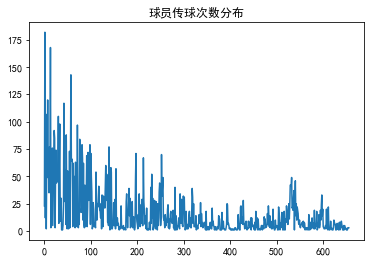

In [15]:
plt.plot(list(numbers))
plt.title('球员传球次数分布')

Text(0, 0.5, '传球次数')

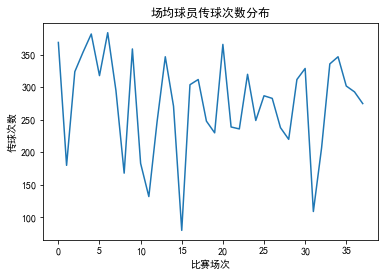

In [16]:
average_number_of_pass
plt.plot(list(average_number_of_pass.values()))
plt.title('场均球员传球次数分布')
plt.xlabel('比赛场次')
plt.ylabel('传球次数')

Text(0, 0.5, '传球次数')

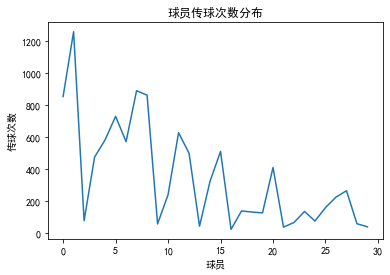

In [17]:
average_number_of_pass_per_person
plt.plot(list(average_number_of_pass_per_person.values()))
plt.title('球员传球次数分布')
plt.xlabel('球员')
plt.ylabel('传球次数')

In [18]:
len(average_number_of_pass_per_person)

30

In [19]:
average_number_of_pass_per_person

{'Huskies_D1': 851,
 'Huskies_M1': 1255,
 'Huskies_M2': 76,
 'Huskies_G1': 473,
 'Huskies_D2': 580,
 'Huskies_D3': 727,
 'Huskies_D4': 569,
 'Huskies_M3': 887,
 'Huskies_F2': 859,
 'Huskies_F3': 56,
 'Huskies_F1': 238,
 'Huskies_D5': 625,
 'Huskies_M4': 497,
 'Huskies_M5': 42,
 'Huskies_D6': 322,
 'Huskies_M6': 508,
 'Huskies_M7': 22,
 'Huskies_M8': 137,
 'Huskies_M9': 130,
 'Huskies_F4': 125,
 'Huskies_D7': 408,
 'Huskies_M10': 36,
 'Huskies_M11': 65,
 'Huskies_M12': 134,
 'Huskies_M13': 74,
 'Huskies_F5': 158,
 'Huskies_F6': 223,
 'Huskies_D8': 263,
 'Huskies_D9': 57,
 'Huskies_D10': 38}

In [20]:
max_ = max(average_number_of_pass_per_person.values())
min_ = min(average_number_of_pass_per_person.values())

In [21]:
for key,value in average_number_of_pass_per_person.items():
    average_number_of_pass_per_person[key]=((value) - min_)/(max_-min_)

In [22]:
average_number_of_pass_per_person

{'Huskies_D1': 0.6723438767234388,
 'Huskies_M1': 1.0,
 'Huskies_M2': 0.043795620437956206,
 'Huskies_G1': 0.3657745336577453,
 'Huskies_D2': 0.45255474452554745,
 'Huskies_D3': 0.5717761557177615,
 'Huskies_D4': 0.44363341443633414,
 'Huskies_M3': 0.7015409570154095,
 'Huskies_F2': 0.6788321167883211,
 'Huskies_F3': 0.027575020275750203,
 'Huskies_F1': 0.17518248175182483,
 'Huskies_D5': 0.48905109489051096,
 'Huskies_M4': 0.38523925385239255,
 'Huskies_M5': 0.016220600162206,
 'Huskies_D6': 0.24330900243309003,
 'Huskies_M6': 0.39416058394160586,
 'Huskies_M7': 0.0,
 'Huskies_M8': 0.09326845093268452,
 'Huskies_M9': 0.08759124087591241,
 'Huskies_F4': 0.08353609083536091,
 'Huskies_D7': 0.31305758313057586,
 'Huskies_M10': 0.0113544201135442,
 'Huskies_M11': 0.034874290348742905,
 'Huskies_M12': 0.0908353609083536,
 'Huskies_M13': 0.042173560421735604,
 'Huskies_F5': 0.11030008110300081,
 'Huskies_F6': 0.1630170316301703,
 'Huskies_D8': 0.1954582319545823,
 'Huskies_D9': 0.0283860502

In [23]:
import json as js

In [24]:
json = {}

In [25]:
map_sportman_reserve

{0: 'Huskies_D1',
 1: 'Huskies_M1',
 2: 'Huskies_M2',
 3: 'Huskies_G1',
 4: 'Huskies_D2',
 5: 'Huskies_D3',
 6: 'Huskies_D4',
 7: 'Huskies_M3',
 8: 'Huskies_F2',
 9: 'Huskies_F3',
 10: 'Huskies_F1',
 11: 'Huskies_D5',
 12: 'Huskies_M4',
 13: 'Huskies_M5',
 14: 'Huskies_D6',
 15: 'Huskies_M6',
 16: 'Huskies_M7',
 17: 'Huskies_M8',
 18: 'Huskies_M9',
 19: 'Huskies_F4',
 20: 'Huskies_D7',
 21: 'Huskies_M10',
 22: 'Huskies_M11',
 23: 'Huskies_M12',
 24: 'Huskies_M13',
 25: 'Huskies_F5',
 26: 'Huskies_F6',
 27: 'Huskies_D8',
 28: 'Huskies_D9',
 29: 'Huskies_D10'}

In [33]:
edge = []
for i in range(len(graph)):
    for j in range(len(graph)):
        if i<j:
            continue
        if graph[i,j]+graph[j,i]>0:
                edge.append({
                    'source':map_sportman_reserve[i],
                    'target':map_sportman_reserve[j],
                    'value':graph[i,j]+graph[j,i]
                })
            
        else:
            continue

In [43]:
node = []
MDF = {'M':0,'D':1,'F':2,'G':3,'1':1}
for key,value in average_number_of_pass_per_person.items():
    node.append(
    {
        'category':(MDF[key[-2]]),
        'name':key,
        'symbolSize':5+value*10,
        'value':int(value*(max_-min_))*0.1
    })

In [44]:
node

[{'category': 1,
  'name': 'Huskies_D1',
  'symbolSize': 11.723438767234388,
  'value': 82.9},
 {'category': 0,
  'name': 'Huskies_M1',
  'symbolSize': 15.0,
  'value': 123.30000000000001},
 {'category': 0,
  'name': 'Huskies_M2',
  'symbolSize': 5.437956204379562,
  'value': 5.4},
 {'category': 3,
  'name': 'Huskies_G1',
  'symbolSize': 8.657745336577452,
  'value': 45.1},
 {'category': 1,
  'name': 'Huskies_D2',
  'symbolSize': 9.525547445255475,
  'value': 55.800000000000004},
 {'category': 1,
  'name': 'Huskies_D3',
  'symbolSize': 10.717761557177615,
  'value': 70.5},
 {'category': 1,
  'name': 'Huskies_D4',
  'symbolSize': 9.436334144363341,
  'value': 54.7},
 {'category': 0,
  'name': 'Huskies_M3',
  'symbolSize': 12.015409570154095,
  'value': 86.5},
 {'category': 2,
  'name': 'Huskies_F2',
  'symbolSize': 11.788321167883211,
  'value': 83.60000000000001},
 {'category': 2,
  'name': 'Huskies_F3',
  'symbolSize': 5.275750202757502,
  'value': 3.4000000000000004},
 {'category': 2

In [45]:
(edge)

[{'source': 'Huskies_D1', 'target': 'Huskies_D1', 'value': 4.0},
 {'source': 'Huskies_M1', 'target': 'Huskies_D1', 'value': 177.0},
 {'source': 'Huskies_M1', 'target': 'Huskies_M1', 'value': 14.0},
 {'source': 'Huskies_M2', 'target': 'Huskies_D1', 'value': 5.0},
 {'source': 'Huskies_M2', 'target': 'Huskies_M1', 'value': 16.0},
 {'source': 'Huskies_M2', 'target': 'Huskies_M2', 'value': 4.0},
 {'source': 'Huskies_G1', 'target': 'Huskies_D1', 'value': 183.0},
 {'source': 'Huskies_G1', 'target': 'Huskies_M1', 'value': 44.0},
 {'source': 'Huskies_G1', 'target': 'Huskies_M2', 'value': 2.0},
 {'source': 'Huskies_G1', 'target': 'Huskies_G1', 'value': 4.0},
 {'source': 'Huskies_D2', 'target': 'Huskies_D1', 'value': 121.0},
 {'source': 'Huskies_D2', 'target': 'Huskies_M1', 'value': 109.0},
 {'source': 'Huskies_D2', 'target': 'Huskies_M2', 'value': 3.0},
 {'source': 'Huskies_D2', 'target': 'Huskies_G1', 'value': 91.0},
 {'source': 'Huskies_D2', 'target': 'Huskies_D2', 'value': 4.0},
 {'source': '

In [46]:
json ={'node':node,'edge':edge}

In [47]:
json

{'node': [{'category': 1,
   'name': 'Huskies_D1',
   'symbolSize': 11.723438767234388,
   'value': 82.9},
  {'category': 0,
   'name': 'Huskies_M1',
   'symbolSize': 15.0,
   'value': 123.30000000000001},
  {'category': 0,
   'name': 'Huskies_M2',
   'symbolSize': 5.437956204379562,
   'value': 5.4},
  {'category': 3,
   'name': 'Huskies_G1',
   'symbolSize': 8.657745336577452,
   'value': 45.1},
  {'category': 1,
   'name': 'Huskies_D2',
   'symbolSize': 9.525547445255475,
   'value': 55.800000000000004},
  {'category': 1,
   'name': 'Huskies_D3',
   'symbolSize': 10.717761557177615,
   'value': 70.5},
  {'category': 1,
   'name': 'Huskies_D4',
   'symbolSize': 9.436334144363341,
   'value': 54.7},
  {'category': 0,
   'name': 'Huskies_M3',
   'symbolSize': 12.015409570154095,
   'value': 86.5},
  {'category': 2,
   'name': 'Huskies_F2',
   'symbolSize': 11.788321167883211,
   'value': 83.60000000000001},
  {'category': 2,
   'name': 'Huskies_F3',
   'symbolSize': 5.275750202757502,


In [50]:
filename='data.json'
with open(filename,'w') as file_obj:
    js.dump(json,file_obj)